## Merge Datasets

In [1]:
from fastai.vision import *

In [2]:
cd ~/tutorials/data/wildlife-classification2

/home/jupyter/tutorials/data/wildlife-classification2


In [3]:
path = Path('/home/jupyter/tutorials/data/wildlife-classification2')

## Import and clean the csv files: 

In [4]:
X_CDB_1 = pd.read_csv(path/"CDB_S1_report_lila.csv", skipinitialspace = True, usecols = ['capture_id','question__species'])
X_CDB_1.columns = ['id','species']
X_CDB_1.to_csv('X_CDB_1.csv', index=False)
X_CDB_1.shape

(12192, 2)

In [5]:
X_CDB_2 = pd.read_csv(path/"CDB_S1_report_lila_image_inventory.csv", usecols = ['capture_id','image_path_rel'])
X_CDB_2 .columns = ['id','path']
X_CDB_2 .to_csv('X_CDB_2 .csv', index=False)
X_CDB_2 .shape

(30551, 2)

In [6]:
X_ENO_1 = pd.read_csv(path/"ENO_S1_report_lila.csv", skipinitialspace = True, usecols = ['capture_id','question__species'])
X_ENO_1.columns = ['id','species']
X_ENO_1.to_csv('X_ENO_1', index=False)
X_ENO_1.shape

(13699, 2)

In [7]:
X_ENO_2 = pd.read_csv(path/"ENO_S1_report_lila_image_inventory.csv", usecols = ['capture_id','image_path_rel'])
X_ENO_2.columns = ['id','path']
X_ENO_2.to_csv('X_ENO_2.csv', index=False)
X_ENO_2.shape

(29414, 2)

In [8]:
X_KGA_1 = pd.read_csv(path/"KGA_S1_report_lila.csv", skipinitialspace = True, usecols = ['capture_id','question__species'])
X_KGA_1.columns = ['id','species']
X_KGA_1.to_csv('X_KGA_1.csv', index=False)
X_KGA_1.shape

(3626, 2)

In [9]:
X_KGA_2 = pd.read_csv(path/"KGA_S1_report_lila_image_inventory.csv", usecols = ['capture_id','image_path_rel'])
X_KGA_2.columns = ['id','path']
X_KGA_2.to_csv('X_KGA_2.csv', index=False)
X_KGA_2.shape

(10357, 2)

In [ ]:
X_KRU_1 = pd.read_csv(path/"KRU_S1_report_lila.csv", skipinitialspace = True, usecols = ['capture_id','question__species'])
X_KRU_1.columns = ['id','species']
X_KRU_1.to_csv('X_KRU_1.csv', index=False)
X_KRU_1.shape

In [ ]:
X_KRU_2 = pd.read_csv(path/"KRU_S1_report_lila_image_inventory.csv", usecols = ['capture_id','image_path_rel'])
X_KRU_2.columns = ['id','path']
X_KRU_2.to_csv('X_KRU_2.csv', index=False)
X_KRU_2.shape

## Combine the individual csv files:

In [10]:
X_CDB_3 = pd.merge(X_CDB_2, X_CDB_1, on='id', how='inner')
X_CDB_3.shape

(30717, 3)

In [11]:
X_ENO_3 = pd.merge(X_ENO_2, X_ENO_1, on='id', how='inner')
X_ENO_3.shape

(30542, 3)

In [12]:
X_KGA_3 = pd.merge(X_KGA_2, X_KGA_1, on='id', how='inner')
X_KGA_3.shape

(10402, 3)

In [ ]:
X_KRU_3 = pd.merge(X_KRU_2, X_KRU_1, on='id', how='inner')
X_KRU_3.shape

## Combine all the csv files into one: 

In [13]:
X_1 = pd.concat([X_CDB_3, X_ENO_3, X_KGA_3], ignore_index=True)
X_1.drop_duplicates(subset='path', keep = False, inplace = True)
X_1 = X_1[X_1.species != 'fire']
X_1 = X_1[X_1.species != 'human']
X_1.shape

(67823, 3)

In [14]:
def w(x):
    if (x == "blank"):
        return "blank"
    else:
        return "animal"

In [15]:
X_1['animal'] = X_1['species'].apply(w)
X_1.to_csv('X_1.csv', index=False)
X_1.head(5)

,id,path,species,animal
6,CDB_S1#A05#1#3,CDB_S1/A05/A05_R1/CDB_S1_A05_R1_IMAG0007.JPG,blank,blank
7,CDB_S1#A05#1#4,CDB_S1/A05/A05_R1/CDB_S1_A05_R1_IMAG0008.JPG,hartebeestred,animal
8,CDB_S1#A05#1#5,CDB_S1/A05/A05_R1/CDB_S1_A05_R1_IMAG0009.JPG,monkeyvervet,animal
9,CDB_S1#A05#1#5,CDB_S1/A05/A05_R1/CDB_S1_A05_R1_IMAG0010.JPG,monkeyvervet,animal
10,CDB_S1#A05#1#5,CDB_S1/A05/A05_R1/CDB_S1_A05_R1_IMAG0011.JPG,monkeyvervet,animal


In [16]:
X_1.loc[35000:35010]

,id,path,species,animal
35000,ENO_S1#B05#2#178,ENO_S1/B05/B05_R2/ENO_S1_B05_R2_IMAG0443.JPG,blank,blank
35001,ENO_S1#B05#2#178,ENO_S1/B05/B05_R2/ENO_S1_B05_R2_IMAG0444.JPG,blank,blank
35002,ENO_S1#B05#2#179,ENO_S1/B05/B05_R2/ENO_S1_B05_R2_IMAG0445.JPG,warthog,animal
35003,ENO_S1#B05#2#179,ENO_S1/B05/B05_R2/ENO_S1_B05_R2_IMAG0446.JPG,warthog,animal
35004,ENO_S1#B05#2#179,ENO_S1/B05/B05_R2/ENO_S1_B05_R2_IMAG0447.JPG,warthog,animal
35005,ENO_S1#B05#2#180,ENO_S1/B05/B05_R2/ENO_S1_B05_R2_IMAG0448.JPG,hyenaspotted,animal
35006,ENO_S1#B05#2#180,ENO_S1/B05/B05_R2/ENO_S1_B05_R2_IMAG0449.JPG,hyenaspotted,animal
35007,ENO_S1#B05#2#180,ENO_S1/B05/B05_R2/ENO_S1_B05_R2_IMAG0450.JPG,hyenaspotted,animal
35008,ENO_S1#B05#2#181,ENO_S1/B05/B05_R2/ENO_S1_B05_R2_IMAG0451.JPG,dikdik,animal
35009,ENO_S1#B05#2#181,ENO_S1/B05/B05_R2/ENO_S1_B05_R2_IMAG0452.JPG,dikdik,animal


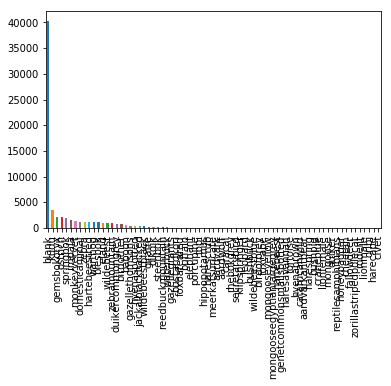

In [17]:
X_1['species'].value_counts().plot(kind='bar')

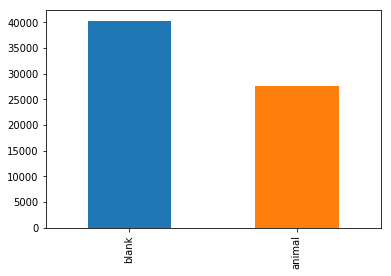

In [18]:
X_1['animal'].value_counts().plot(kind='bar')

## Create a binary animal/blank csv

In [22]:
X_2 = pd.read_csv(path/"X_1.csv", usecols = ['path','animal'])
X_2.to_csv('X_2.csv', index=False)
X_2.head(10)

,path,animal
0,CDB_S1/A05/A05_R1/CDB_S1_A05_R1_IMAG0007.JPG,blank
1,CDB_S1/A05/A05_R1/CDB_S1_A05_R1_IMAG0008.JPG,animal
2,CDB_S1/A05/A05_R1/CDB_S1_A05_R1_IMAG0009.JPG,animal
3,CDB_S1/A05/A05_R1/CDB_S1_A05_R1_IMAG0010.JPG,animal
4,CDB_S1/A05/A05_R1/CDB_S1_A05_R1_IMAG0011.JPG,animal
5,CDB_S1/A05/A05_R1/CDB_S1_A05_R1_IMAG0012.JPG,animal
6,CDB_S1/A05/A05_R1/CDB_S1_A05_R1_IMAG0013.JPG,animal
7,CDB_S1/A05/A05_R1/CDB_S1_A05_R1_IMAG0014.JPG,animal
8,CDB_S1/A05/A05_R1/CDB_S1_A05_R1_IMAG0015.JPG,animal
9,CDB_S1/A05/A05_R1/CDB_S1_A05_R1_IMAG0016.JPG,animal


#### Create a tiny dataset to experiment with:

In [23]:
X_2_xxx = X_2.sample(frac=0.02, random_state=1)
X_2_xxx.to_csv('X_2_xxx.csv', index=False)
X_2_xxx.shape

(1356, 2)

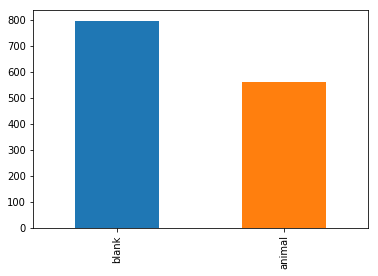

In [24]:
X_2_xxx['animal'].value_counts().plot(kind='bar')